In [69]:
import numpy as np
from scipy.special import comb
from addressing import addressing_array, addressing_single_graph, de_addressing_array, de_addressing_single_graph
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white',font_scale=2)

In [70]:
NE = 3
NO = 6
NConf = int(comb(NO,NE))
NConf

20

In [71]:
Z = addressing_array(NE,NO)
Zd = de_addressing_array(Z)

### CAS(3,6): $\sum_{ij} <K|\hat{E}_{ij}|L> $

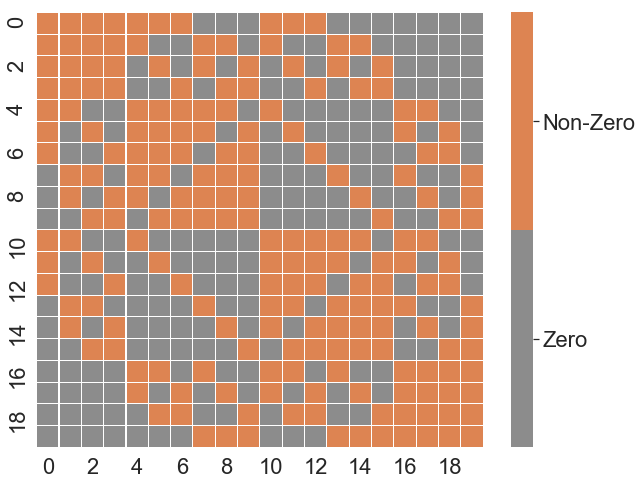

In [107]:
configs = [de_addressing_single_graph(K+1, Z, Zd) for K in range(NConf)]

A = np.zeros(shape=(NConf,NConf)) 
for K in range(NConf):
    for L in range(NConf):
        if sum(np.array(list(configs[K])) != np.array(list(configs[L]))) <= 2:
        #print(configs[K], configs[L], np.array(list(configs[K])) != np.array(list(configs[L])))
            A[K][L] = 1.

            
fig, ax =plt.subplots(figsize=(10,8))
colormap = ['C7','C1']
sns.heatmap(A,linewidth=0.1, cmap=colormap,ax=ax)
#sns.heatmap(((np.matmul(A,A) - A) != 0).astype(int),linewidth=0.1, cmap=colormap,ax=ax)

# Get the colorbar object from the Seaborn heatmap
colorbar = ax.collections[0].colorbar
# The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
r = colorbar.vmax - colorbar.vmin
n = len(['C7','C1'])
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Zero','Non-Zero'])

### CAS(3,6)/GAS[(3,3),(0,3)]: $\sum_{ij}  <K|\hat{E}_{ij}|L> $

In [116]:
configs_alternative = ['111000', '110100', '101100', '011100', '110010',
                       '101010', '011010', '110001', '101001', '011001',
                       '100110', '010110', '001110', '100101', '010101',
                       '001101', '100011', '010011', '001011', '000111']

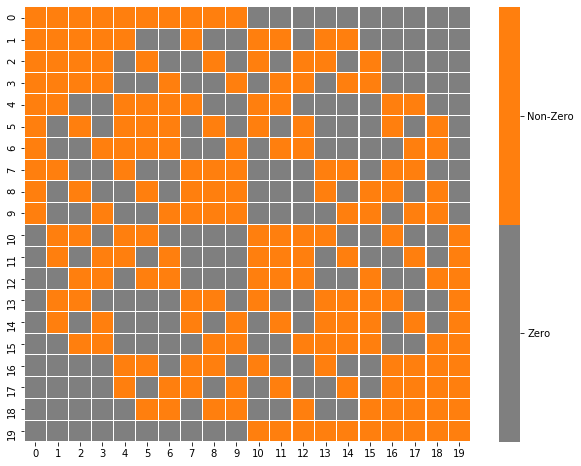

In [232]:
A = np.zeros(shape=(NConf,NConf)) 
for K in range(NConf):
    for L in range(NConf):
        if sum(np.array(list(configs_alternative[K])) != np.array(list(configs_alternative[L]))) <= 2:
        #print(configs[K], configs[L], np.array(list(configs[K])) != np.array(list(configs[L])))
            A[K][L] = 1.

            
fig, ax =plt.subplots(figsize=(10,8))            
sns.heatmap(A, linewidth=0.1, ax=ax, cmap=['C7','C1'])

# Get the colorbar object from the Seaborn heatmap
colorbar = ax.collections[0].colorbar
# The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Zero','Non-Zero'])

### CAS(3,6)/GAS[(2,2),(1,2),(0,2)]: $\sum_{ij}  <K|\hat{E}_{ij}|L> $

In [234]:
configs_alternative2 = ['111000', '110100', '101100', '011100', '110010',
                        '110001', '101010', '101001', '100110', '100101',
                        '011010', '011001', '010110', '010101', '001110',
                        '001101', '100011', '010011', '001011', '000111']

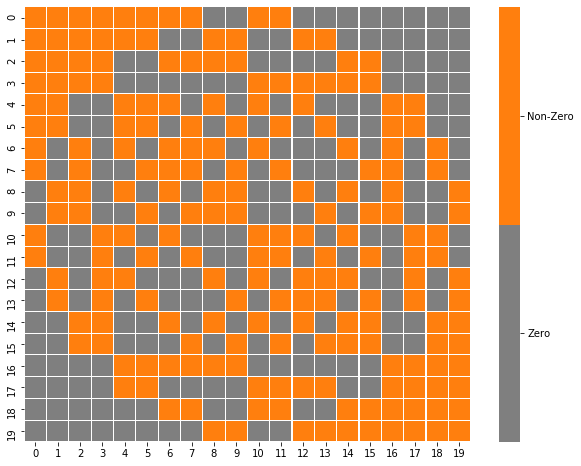

In [235]:
A = np.zeros(shape=(NConf,NConf)) 
for K in range(NConf):
    for L in range(NConf):
        if sum(np.array(list(configs_alternative2[K])) != np.array(list(configs_alternative2[L]))) <= 2:
        #print(configs[K], configs[L], np.array(list(configs[K])) != np.array(list(configs[L])))
            A[K][L] = 1.

            
fig, ax =plt.subplots(figsize=(10,8))            
sns.heatmap(A, linewidth=0.1, ax=ax, cmap=['C7','C1'])

# Get the colorbar object from the Seaborn heatmap
colorbar = ax.collections[0].colorbar
# The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
colorbar.set_ticklabels(['Zero','Non-Zero'])

In [94]:
(1 - compute_intra_cat_excitation_sparcity(10,5,1)

0.01064499874023683

In [92]:
compute_intra_cat_excitation_sparcity(10,5,2)

0.5

### Intra-Category Interaction Sparcity 

In [2]:
def compute_intra_cat_excitation_sparcity(NO,NE,interacting_e=1):
    return 1 - sum([comb(NO-NE, iE)*comb(NE, iE) for iE in range(interacting_e+1)])/comb(NO,NE)

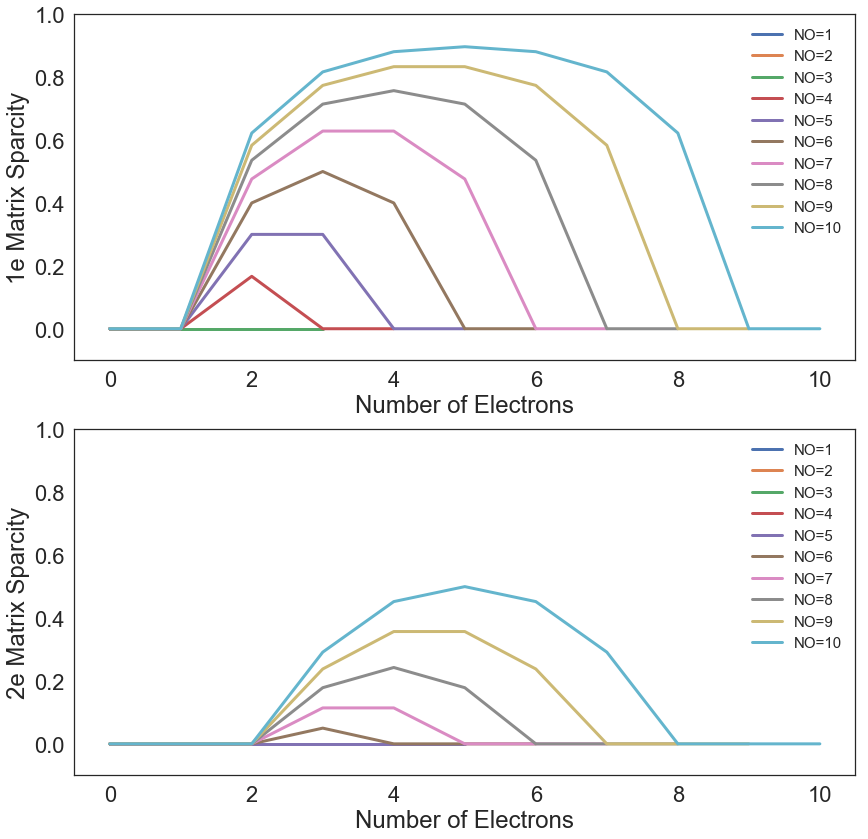

In [60]:
Ne = range(11)
No = range(1,11)

fig, ax =plt.subplots(2,1,figsize=(14,14))
for ie in (1,2):
    Sp = {}
    for io in No:
        Sp[str(io)] = [compute_intra_cat_excitation_sparcity(io,i, ie) for i in range(io+1)]

    for io, sp_i in Sp.items():
        ax[ie-1].plot(Ne[:len(sp_i)], sp_i, label='NO='+io, linewidth=3)

    ax[ie-1].legend(frameon=False, fontsize=15)
    ax[ie-1].set_xlabel('Number of Electrons')
    ax[ie-1].set_ylabel(str(ie)+'e Matrix Sparcity')
    ax[ie-1].set_ylim([-0.1,1])



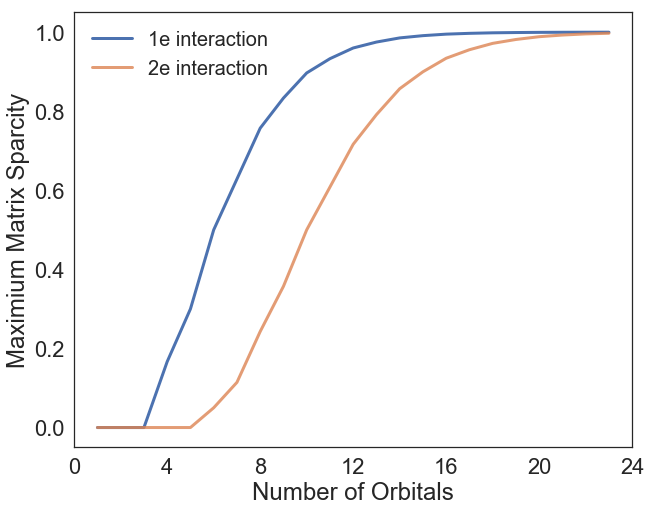

In [62]:
NO = range(1,24)
Sp1 = [ compute_intra_cat_excitation_sparcity(i,int(i/2),1) for i in NO ]
Sp2 = [ compute_intra_cat_excitation_sparcity(i,int(i/2),2) for i in NO ]


fig, ax =plt.subplots(figsize=(10,8))

ax.plot(NO, Sp1, label='1e interaction', linewidth=3)
ax.plot(NO, Sp2, label='2e interaction', linewidth=3,alpha=0.8)
ax.set_xlabel('Number of Orbitals')
ax.set_ylabel('Maximium Matrix Sparcity')
ax.set_xlim([0,24])
ax.set_xticks(list(range(0,25,4)))
ax.legend(frameon=False, fontsize=20)

In [63]:
from utils import compute_NConf_GHF_GAS_Cat

In [134]:
def compute_matrix_sparcity(NOs,NEs,Excitations):
    """
    Args:
        Excitations: Excitation from Category L to Category K
        NOs: Orbitals of Category L
        NEs: Orbitals of Category K
    """
    assert isinstance(Excitations,list) 
    
    NNonZeroK = 0
    NK = compute_NConf_GHF_GAS_Cat(NOs,NEs)
    
    n_space = len(NOs)
    n_space_invovled = set()
    for ex in Excitations:
        n_space_invovled.add(ex[0])
        n_space_invovled.add(ex[1])
    
    assert len(n_space_invovled) == n_space 
    
    ne_lose = np.zeros(n_space,dtype=int)
    ne_gain = np.zeros(n_space,dtype=int)
    
    for ex in Excitations:
        ne_lose[ex[0]] -= 1
        ne_gain[ex[1]] += 1
    
    ne_change  = ne_lose + ne_gain
    
    ne_same_indexes = ((-ne_lose + ne_gain) - ne_change) / 2
    
    NNonZeroKOffset = 1
    for i in range(n_space):
        if ne_change[i] > 0:
            NNonZeroKOffset *= comb(NOs[i]-NEs[i], ne_change[i])
        elif ne_change[i] < 0:
            NNonZeroKOffset *= comb(NEs[i], -ne_change[i])
    
    
    while not all(ne_same_indexes == 0):
        NNonZeroKTemp = NNonZeroKOffset  
    
        for i in range(n_space):
            ie = ne_same_indexes[i]
            if ie != 0: NNonZeroKTemp *= comb(NOs[i]-NEs[i], ie)*comb(NEs[i], ie)
        
        NNonZeroK += NNonZeroKTemp
        
        ne_same_indexes[np.nonzero(ne_same_indexes)[0][0]] -= 1
        
    
    NNonZeroK += NNonZeroKOffset
    
    return 1 - NNonZeroK/NK

In [138]:
compute_matrix_sparcity([10],[5],[(0,0)])

0.8968253968253969

In [137]:
Sp1

[0.0,
 0.0,
 0.0,
 0.16666666666666663,
 0.30000000000000004,
 0.5,
 0.6285714285714286,
 0.7571428571428571,
 0.8333333333333334,
 0.8968253968253969,
 0.9329004329004329,
 0.95995670995671,
 0.9749417249417249,
 0.9854312354312355,
 0.9911421911421912,
 0.9949494949494949,
 0.9969971205265323,
 0.9983134512546277,
 0.9990149169715733,
 0.9994533330446643,
 0.999685299220903,
 0.9998270563286044,
 0.9999016328939603]

In [136]:
compute_matrix_sparcity([6],[3],[(0,0)])

0.5

In [186]:
compute_inter_excitation_sparcity([3,3], [2,1])

0.5555555555555556

In [116]:
np.nonzero([1,2])[0][0]

0

In [67]:
set(ex) == {(0,0)}

True

In [141]:
compute_sparcity(6,3,1)

[1.0, 9.0]


0.5

In [143]:
compute_sparcity(8,4,2)

[1.0, 16.0, 36.0]


0.24285714285714288

In [95]:
compute_sparcity_of_A(2,1)

0.0

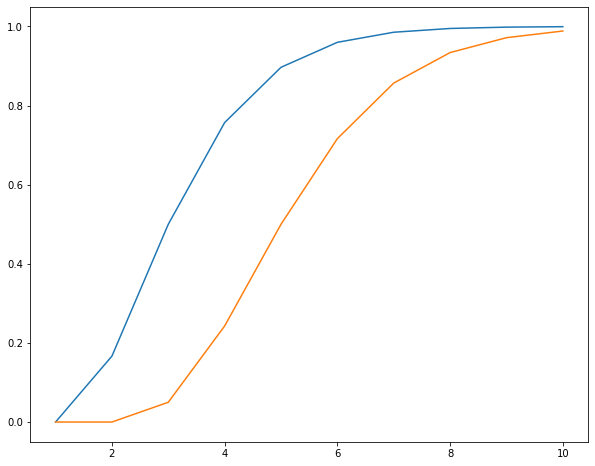

In [153]:
Ne = range(1,11)
Sp1 = [ compute_sparcity(2*i,i,1) for i in Ne ]
Sp2 = [ compute_sparcity(2*i,i,2) for i in Ne ]


fig, ax =plt.subplots(figsize=(10,8))   
ax.plot(Ne, Sp1)
ax.plot(Ne, Sp2)

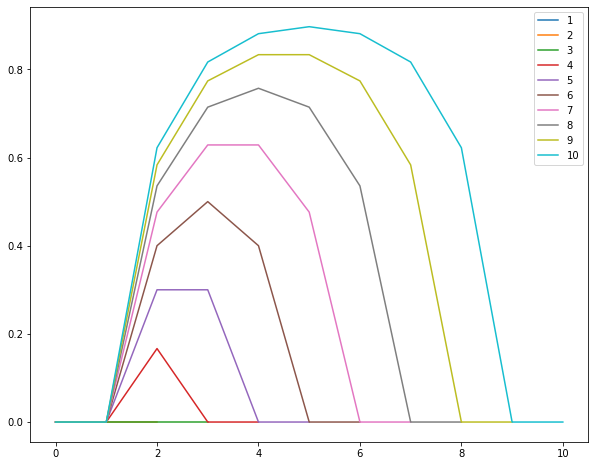

In [152]:
Ne = range(11)
No = range(1,11)

Sp = {}
for io in No:
    Sp[str(io)] = [compute_sparcity(io,i, 1) for i in range(io+1)]
    
fig, ax =plt.subplots(figsize=(10,8))
for io, sp_i in Sp.items():
    ax.plot(Ne[:len(sp_i)], sp_i, label=io)

ax.legend()

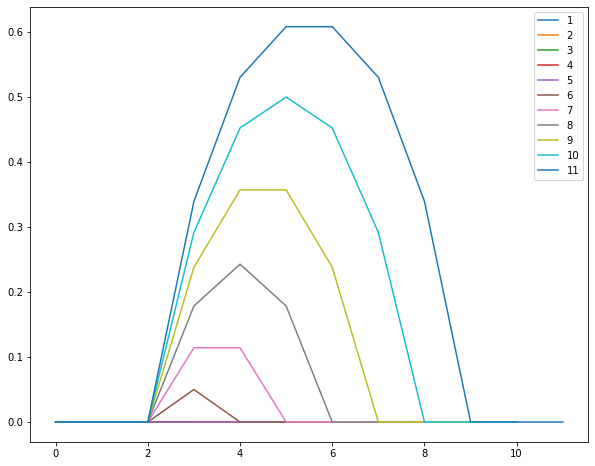

In [149]:
Ne = range(12)
No = range(1,12)

Sp = {}
for io in No:
    Sp[str(io)] = [compute_sparcity(io,i, 2) for i in range(io+1)]
    
fig, ax =plt.subplots(figsize=(10,8))
for io, sp_i in Sp.items():
    ax.plot(Ne[:len(sp_i)], sp_i, label=io)

ax.legend()